Gestión de la demanda

Problemas que resolvemos con los análisis de Gestión de la Demanda

1. Análisis de ventas por producto, categoría o SKU

Problema: No se sabe qué productos son los que más aportan a las ventas totales.

Qué resolvemos:
Identificar productos “estrella” vs. “cola larga” (pocos ingresos).
Priorización de portafolio.
Enfocar esfuerzos comerciales en productos de alto impacto.

Index(['Category', 'Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')
  Product type  Number of products sold  Revenue generated      Price  \
0   cosmetics1                      426        8496.103813  42.958384   
1  cosmetics10                      449        6541.329345  84.957787   
2  cosmetics11                      705        9692.318040  52.075931   
3  cosmetics12                      919        7152.286049  51.355791   
4  cosmetics13                       99        8001.613207  78.897913   

   Stock levels  
0          93.0  
1          42.0  


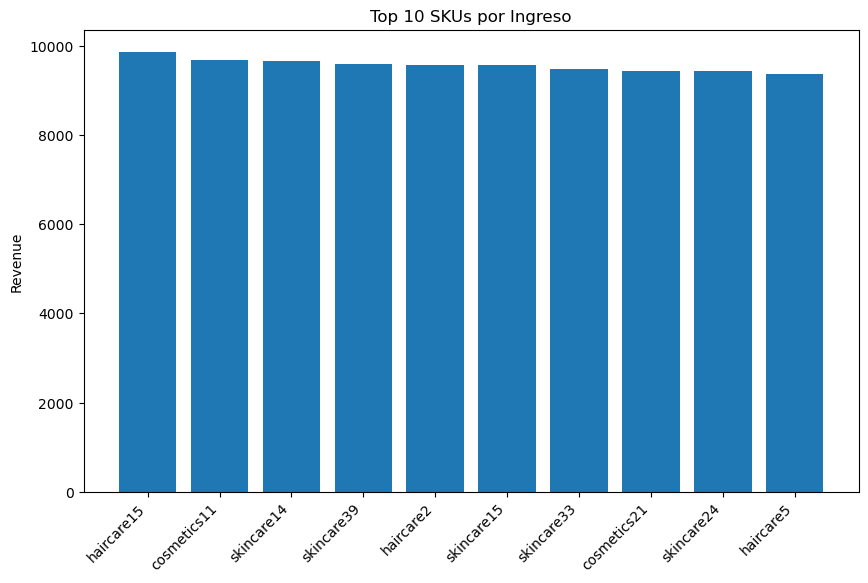

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("supply_chain_data.csv")

print(df.columns)

#Ventas totales por sku (tipo de producto)
sku_sales = df.groupby("Product type").agg({
    "Number of products sold": "sum",
    "Revenue generated": "sum",
    "Price": "mean",
    "Stock levels": "mean"
}).reset_index()

print(sku_sales.head())

#Graficamos Top 10 princinpales SKU por ingresos

top10_skus = sku_sales.sort_values("Revenue generated", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top10_skus["Product type"], top10_skus["Revenue generated"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 SKUs por Ingreso")
plt.ylabel("Revenue")
plt.show()
    


2. Identificar productos más vendidos y menos vendidos

Problema: Recursos de marketing y producción se asignan sin priorización clara.
Qué resolvemos:

Evitar invertir en productos de bajo desempeño.
Detectar candidatos para descontinuación o promoción.
Optimizar espacio en inventario y canales de venta.

In [7]:
#Top de 10 productos mas vendidos por unidades
top_units = sku_sales.sort_values("Number of products sold", ascending=False).head(10)
print("Top 10 productos mas vendidos:\n", top_units)

#Top 10 productos menos vendidos

bottom_units = sku_sales.sort_values("Number of products sold", ascending=True).head(10)
print("Top 10 productos menos vendidos:\n", bottom_units)

Top 10 productos mas vendidos:
    Product type  Number of products sold  Revenue generated      Price  \
96    skincare6                      996        2330.965802  15.707796   
17  cosmetics25                      987        7888.356547   3.037689   
95    skincare5                      980        4971.145988  64.015733   
68   skincare17                      963        7573.402458   9.813003   
69   skincare18                      963        2438.339930  23.399845   
97    skincare7                      960        6099.944116  90.635460   
43   haircare25                      946        1292.458418   6.306883   
72   skincare20                      933        5724.959350  80.541424   
3   cosmetics12                      919        7152.286049  51.355791   
15  cosmetics23                      916        1935.206794  62.111965   

    Stock levels  
96          51.0  
17          77.0  
95          14.0  
68          18.0  
69          25.0  
97          46.0  
43           5.0  
7

3. Relación entre precio y volumen de ventas

Problema: Desconocimiento de la elasticidad precio–demanda.

Qué resolvemos:
Ajustar estrategias de precios.
Detectar si un precio bajo realmente impulsa la venta o solo reduce margen.
Identificar productos “premium” que venden bien aún con precio alto.

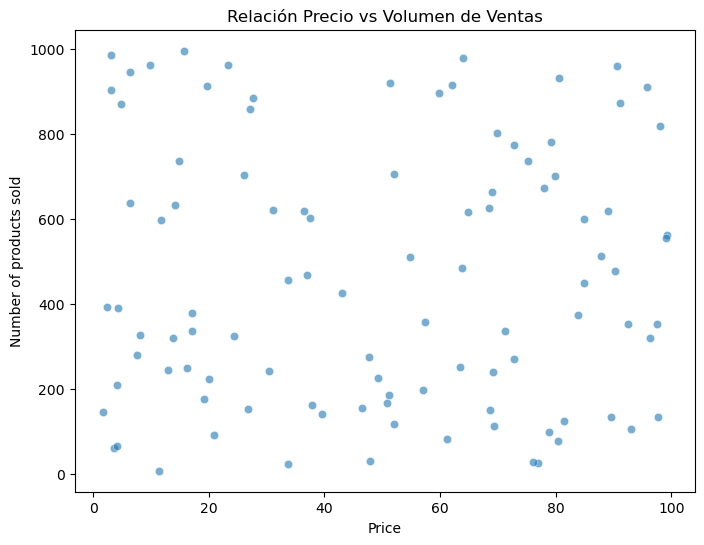

Coeficiente (pendiente): 0.05593975270571644
Intercepto: 458.2230821441661
R2: 3.294168115575147e-05
Elasticidad estimada: 0.019833900323120622


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# ---------------------------
# Precio vs unidades (scatter)
# ---------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x="Price", y="Number of products sold", data=df, alpha=0.6)
plt.title("Relación Precio vs Volumen de Ventas")
plt.show()

# ---------------------------
# Regresión lineal
# ---------------------------
X = df[["Price"]]
y = df[["Number of products sold"]]

model = LinearRegression()
model.fit(X,y)

coef = model.coef_[0][0]
intercept = model.intercept_[0]
r2 = model.score(X,y)

print("Coeficiente (pendiente):", coef)
print("Intercepto:", intercept)
print("R2:", r2)

# ---------------------------
# Elasticidad (log-log)
# ---------------------------
df_elasticity = df.copy()
df_elasticity = df_elasticity[(df_elasticity["Price"]>0) & (df_elasticity["Number of products sold"]>0)]

X_log = np.log(df_elasticity["Price"]).values.reshape(-1,1)
y_log = np.log(df_elasticity["Number of products sold"])

model_log = LinearRegression()
model_log.fit(X_log, y_log)

elasticity = model_log.coef_[0]
print("Elasticidad estimada:", elasticity)

# ---------------------------
# Preparar resultados para exportar
# ---------------------------

# Dataset de precio y unidades
price_volume = df[["SKU", "Product type", "Price", "Number of products sold"]].dropna()

# Resultados de la regresión y elasticidad
regression_results = pd.DataFrame({
    "Coeficiente (pendiente)": [coef],
    "Intercepto": [intercept],
    "R2": [r2],
    "Elasticidad estimada": [elasticity]
})



4. Segmentación de clientes (Customer demographics)

Problema: Estrategias comerciales generalistas que no consideran perfil del cliente.

Qué resolvemos:
Conocer qué segmentos de clientes generan mayor revenue.
Diseñar promociones específicas (ej. campañas por género, edad, ubicación).
Detectar nichos de mercado desatendidos.

  Customer demographics  Number of products sold  Revenue generated      Price
0                Female                    12801      161514.489122  43.517258
1                  Male                     7507      126634.394260  49.545774
2            Non-binary                    10580      116365.801520  46.500652
3               Unknown                    15211      173090.133837  56.398014


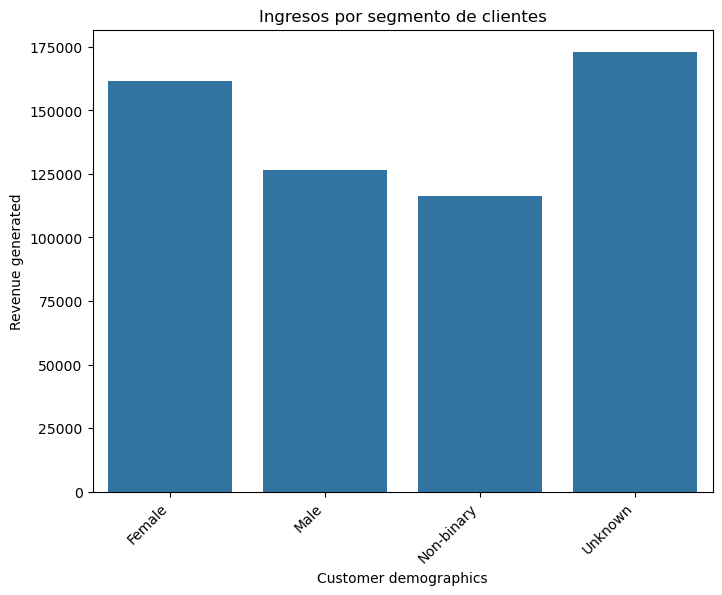

In [15]:
#Ventas por segmento demografico
customer_seg = df.groupby("Customer demographics").agg({
    "Number of products sold":"sum",
    "Revenue generated":"sum",
    "Price": "mean",
}).reset_index()

print(customer_seg)

#Gráfico
plt.figure(figsize=(8,6))
sns.barplot(x="Customer demographics", y="Revenue generated", data=customer_seg)
plt.xticks(rotation=45, ha="right")
plt.title("Ingresos por segmento de clientes")
plt.show()
            

In [27]:
#Exportar a excel

output_file = "Analisis_Gestion_de_demanda.xlsx"

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    sku_sales.to_excel(writer, sheet_name="Ventas_SKU", index=False)
    top_units.to_excel(writer, sheet_name="Top_10", index=False)
    bottom_units.to_excel(writer, sheet_name="Bottom_10", index=False)
    price_volume.to_excel(writer, sheet_name="Precio_vs_Ventas", index=False)
    regression_results.to_excel(writer, sheet_name="Resultados_Regresion", index=False)
    customer_seg.to_excel(writer, sheet_name="Clientes", index=False)

print(f"✅ Archivo exportado: {output_file}")
    

✅ Archivo exportado: Analisis_Gestion_de_demanda.xlsx


Analisis Segmentación de productos (ABC), (ABC - XYZ), Syntetos–Boylan, Croston, Análisis ABC multi-criterio